In [1]:
from qiskit import *
import numpy as np
from qiskit.visualization import *

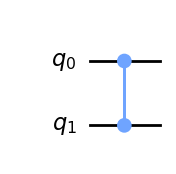

In [2]:
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw('mpl')

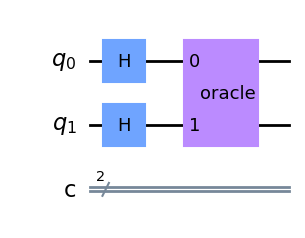

In [3]:
simulator = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw('mpl')

In [4]:
result = execute(grover_circ, backend=simulator).result()

In [5]:
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

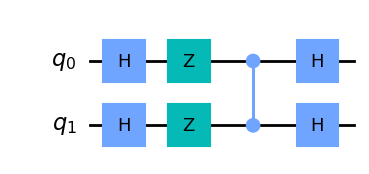

In [6]:
reflection = QuantumCircuit(2, name = 'reflection')
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw('mpl')

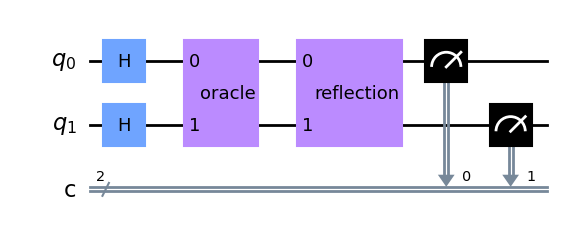

In [7]:
qasm_simulator = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw('mpl')

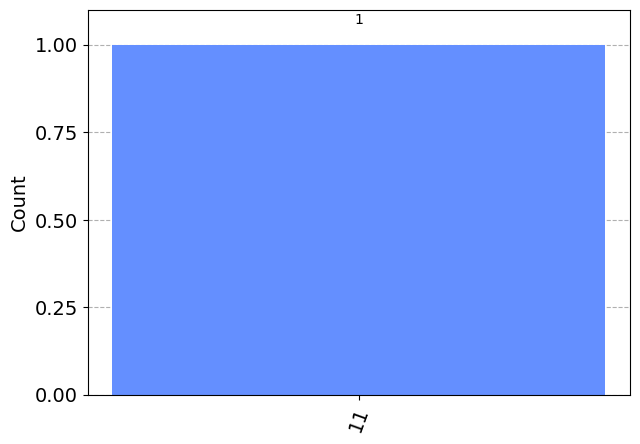

In [8]:
result = execute(grover_circ, backend=qasm_simulator, shots=1).result()
plot_histogram(result.get_counts())